<a href="https://colab.research.google.com/github/bharathbolla/EVA5/blob/s12/Annotations_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-10-18 17:12:26.642532


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/EVA5/S12_Assignment

/content/gdrive/My Drive/Colab Notebooks/EVA5/S12_Assignment


In [6]:
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [7]:
file = open('Annotations_Assignment_12.json')
data = json.load(file)
print(data.keys())

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])


In [8]:
annotations_df = pd.DataFrame.from_dict(data['annotations'])
images_df = pd.DataFrame.from_dict(data['images'])

images_df.head()

,id,width,height,file_name,license,date_captured
0,1,268,188,mask_1.jpg,0,
1,2,275,183,mask_3.jpg,0,
2,3,183,275,mask_2.jpg,0,
3,4,268,188,mask_5.jpg,0,
4,5,270,187,mask_6.jpg,0,


In [9]:
annotations_df.head()

,segmentation,area,bbox,iscrowd,id,image_id,category_id
0,"[[54, 63, 124, 63, 124, 167, 54, 167]]",7280,"[54, 63, 70, 104]",0,1,1,3
1,"[[5, 6, 182, 6, 182, 47, 5, 47]]",7257,"[5, 6, 177, 41]",0,2,1,1
2,"[[102, 58, 206, 58, 206, 171, 102, 171]]",11752,"[102, 58, 104, 113]",0,3,2,2
3,"[[126, 6, 178, 6, 178, 29, 126, 29]]",1196,"[126, 6, 52, 23]",0,4,2,1
4,"[[119, 37, 181, 37, 181, 55, 119, 55]]",1116,"[119, 37, 62, 18]",0,5,2,3


In [10]:
imp_df = pd.concat([images_df, annotations_df], 1)[['file_name', 'width', 'height', 'bbox']]
x_ = []
y_ = []
w_ = []
h_ = [] 
for row in range(imp_df.shape[0]):
  x_.append(imp_df['bbox'][row][0])
  y_.append(imp_df['bbox'][row][1])
  w_.append(imp_df['bbox'][row][2])
  h_.append(imp_df['bbox'][row][3])
box_df = pd.DataFrame(list(zip(x_, y_, w_, h_)), columns =['x', 'y', 'box_width', 'box_height'])
imp_df = pd.concat([imp_df, box_df], 1)
imp_df = imp_df.drop('bbox', axis =1)
imp_df.head()

,file_name,width,height,x,y,box_width,box_height
0,mask_1.jpg,268.0,188.0,54,63,70,104
1,mask_3.jpg,275.0,183.0,5,6,177,41
2,mask_2.jpg,183.0,275.0,102,58,104,113
3,mask_5.jpg,268.0,188.0,126,6,52,23
4,mask_6.jpg,270.0,187.0,119,37,62,18


In [11]:
imp_df['x'] = imp_df['x'] / imp_df['width']
imp_df['y'] = imp_df['y'] / imp_df['height']
imp_df['box_width'] = imp_df['box_width'] / imp_df['width']
imp_df['box_height'] = imp_df['box_height'] / imp_df['height']
imp_df.head()

,file_name,width,height,x,y,box_width,box_height
0,mask_1.jpg,268.0,188.0,0.201493,0.335106,0.261194,0.553191
1,mask_3.jpg,275.0,183.0,0.018182,0.032787,0.643636,0.224044
2,mask_2.jpg,183.0,275.0,0.557377,0.210909,0.568306,0.410909
3,mask_5.jpg,268.0,188.0,0.470149,0.031915,0.194030,0.122340
4,mask_6.jpg,270.0,187.0,0.440741,0.197861,0.229630,0.096257


In [14]:
imp_df.isnull().sum()


file_name     203
width         203
height        203
x             203
y             203
box_width     203
box_height    203
dtype: int64

In [16]:
imp_df.tail()

,file_name,width,height,x,y,box_width,box_height
314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
imp_df.shape

(319, 7)

In [18]:
imp_df.dropna(inplace=True)
imp_df.isnull().sum()

file_name     0
width         0
height        0
x             0
y             0
box_width     0
box_height    0
dtype: int64

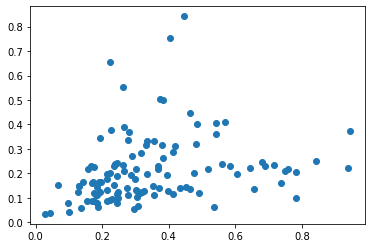

In [19]:
imp_stripped = imp_df[["box_width", "box_height"]].to_numpy()
plt.scatter(imp_stripped[:,0], imp_stripped[:,1])

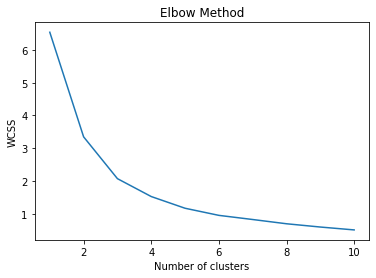

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(imp_stripped)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter = 300,n_init=10,random_state=0)

y_kmeans=kmeans.fit_predict(imp_stripped)

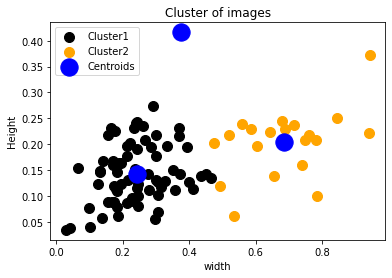

In [22]:
plt.scatter(imp_stripped[y_kmeans==0, 0], imp_stripped[y_kmeans ==0, 1], s=100, c='black', label = 'Cluster1')
plt.scatter(imp_stripped[y_kmeans==1, 0], imp_stripped[y_kmeans ==1, 1], s=100, c='orange', label = 'Cluster2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='blue', label = 'Centroids') 
plt.title('Cluster of images')
plt.xlabel('width')
plt.ylabel ('Height')
plt.legend()
plt.show()